In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
Los propósitos de este código son calcular y graficar la dependencia de las diferentes formas funcionales de mu 
respecto al radio y, calcular y graficar las aceleraciones newtoniana y mondianas para un bulbo galáctico junto con
un disco galáctico y el halo, por lo tanto, los perfiles de potencial que serán utilizados son el de Hernquist para 
el bulbo y para el halo y el de disco exponencial
'''

'\nLos propósitos de este código son calcular y graficar la dependencia de las diferentes formas funcionales de mu \nrespecto al radio y, calcular y graficar las aceleraciones newtoniana y mondianas para un bulbo galáctico junto con\nun disco galáctico y el halo, por lo tanto, los perfiles de potencial que serán utilizados son el de Hernquist para \nel bulbo y para el halo y el de disco exponencial\n'

In [3]:
## Creamos el vector r [1 kpc], desde 0 hasta 50 con paso de 0.01

r = np.arange(0.001, 50.1, 0.01)  ## Unidad de referencia de longitud 1kpc

## Definamos las constantes

M_b = 1.0 ## 10^10 masas solares. Masa del bulbo de la Vía Láctea. Unidad de referencia de masa: 10^10 masas solares

G = 430007.1  ## Unidad de referencia de tiempo 1.1Gyr

a_0 = 4679.4 ## [kpc/Gyr^2]

b_b = 2.0 ## escala característica del bulbo

In [4]:
## Definimos las funciones de la velocidad circular del disco al cuadrado y la velocidad circular del bulbo al
## cuadrado

def vel_cir_halo_cuadrado(M_h, b_h, r):
    vel_cir_halo_cuadrado = (r*G*M_h)/((r+b_h)*(r+b_h))
    return vel_cir_halo_cuadrado

from scipy.special import i0, i1, k0, k1

def vel_cir_disco_cuadrado(M_d, R_d, r):
    Sigma_0 = M_d/(2*np.pi*R_d*R_d)
    y = r/(2.0*R_d)
    vel_cir_disco_cuadrado = ((0.5*np.pi*G*Sigma_0*r*r)/R_d)*(i0(y)*k0(y) - i1(y)*k1(y))
    return vel_cir_disco_cuadrado

def vel_cir_bulbo_cuadrado(M_b, b_b, r):
    vel_cir_bulbo_cuadrado = (r*G*M_b)/((r+b_b)*(r+b_b))
    return vel_cir_bulbo_cuadrado

## Definimos las velocidades circulares del disco y del bulbo

def vel_cir_halo(vel_cir_halo_cuadrado):
    vel_cir_halo = np.sqrt(vel_cir_halo_cuadrado)
    return vel_cir_halo

def vel_cir_disco(vel_cir_disco_cuadrado):
    vel_cir_disco = np.sqrt(vel_cir_disco_cuadrado)
    return vel_cir_disco

def vel_cir_bulbo(vel_cir_bulbo_cuadrado):
    vel_cir_bulbo = np.sqrt(vel_cir_bulbo_cuadrado)
    return vel_cir_bulbo

## Definimos las funciones de las aceleraciones del bulbo, del disco y la total

def a_halo(M_h, b_h, r):
    a_halo = (G*M_h)/((r+b_h)*(r+b_h)) 
    return a_halo

def a_disco(vel_cir_disco_cuadrado, r):
    a_disco = vel_cir_disco_cuadrado/r
    return a_disco

def a_bulbo(M_b, b_b, r):
    a_bulbo = (G*M_b)/((r+b_b)*(r+b_b)) 
    return a_bulbo
    
def a_total(a_halo, a_disco, a_bulbo):
    a_total = a_halo + a_disco + a_bulbo
    return a_total

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Velocidad Circular Halo Newton')

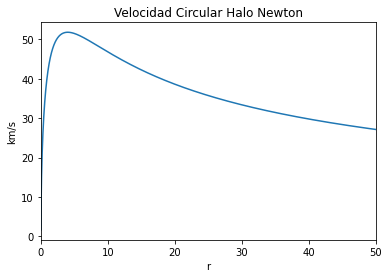

In [5]:
## Graficamos la velocidad circular del disco junto con el bulbo

M_h = 0.1   ## Unidades de 10^10 masas solares. Masa del halo de la Vía Láctea

b_h = 4.0   ## Unidades de kpc. Escala radial del halo.

plt.plot(r, vel_cir_halo(vel_cir_halo_cuadrado(M_h, b_h, r)))
plt.xlim(0, 50)
#plt.ylim(100, 280)
plt.xlabel('r')
plt.ylabel('km/s')
plt.title('Velocidad Circular Halo Newton')

Text(0.5, 1.0, 'Velocidad Circular Newton \n Halo + Disco + Bulbo')

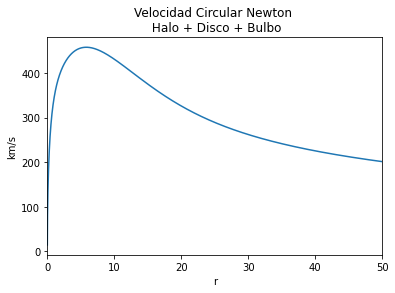

In [6]:
## Graficamos la velocidad circular del halo, el disco y el bulbo

M_d = 5.6   ## Unidades de 10^10 masas solares. Masa del disco de la Vía Láctea

R_d = 3.5   ## Unidades de kpc. Escala radial del disco.


plt.plot(r, np.sqrt(vel_cir_halo_cuadrado(M_b, b_b, r) + vel_cir_disco_cuadrado(M_d, R_d, r) + 
                    vel_cir_bulbo_cuadrado(M_b, b_b, r)))
plt.xlim(0, 50)
#plt.ylim(100, 280)
plt.xlabel('r')
plt.ylabel('km/s')
plt.title('Velocidad Circular Newton \n Halo + Disco + Bulbo')

In [7]:
## Definimos las funciones de las formas funcionales de mu

## R.A.R.: mu(a_N) = (1- exp(-sqrt(a_N/a_0)))^-1

def mu_R(r, a_N):
    mu_R = 1/(1 - np.exp(-np.sqrt(a_N/a_0)))
    return mu_R

## Simple: mu(a_N) = 0.5(1 + sqrt(1 + 4/(a_N/a_0)))

def mu_S (r, a_N):
    mu_S = 0.5*(1 + np.sqrt(1 + 4*a_0/a_N))
    return mu_S

## Standard: mu(a_N) = sqrt(0.5(1+sqrt(1 + (2/(a_N/a_0))^2)))

def mu_Sd(r, a_N):
    mu_Sd = np.sqrt(0.5*(1 +np.sqrt(1 + 4*a_0*a_0/(a_N*a_N))))
    return mu_Sd


Text(0.5, 1.0, 'Formas funcionales $\\mu$(a) respecto al radio \n Para Halo + Disco + Bulbo')

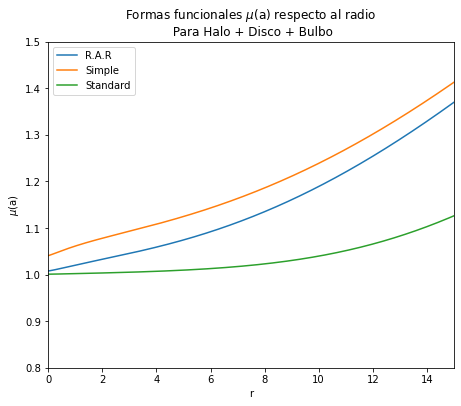

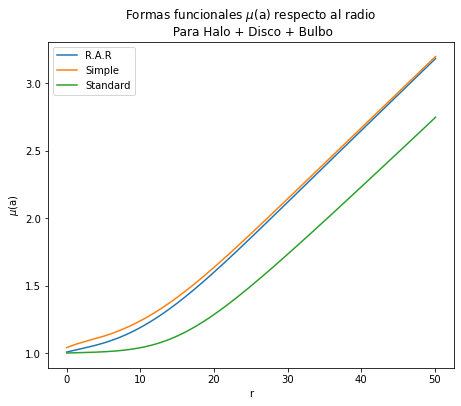

In [8]:
## Graficamos las formas funcionales de mu respecto a r para el halo, el disco y el bulbo

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(r, mu_R(r, a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), 
                            a_bulbo(M_b, b_b, r))), label='R.A.R')
plt.plot(r, mu_S(r, a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), 
                            a_bulbo(M_b, b_b, r))), label='Simple')
plt.plot(r, mu_Sd(r, a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), 
                                                  a_bulbo(M_b, b_b, r))), label='Standard')
plt.legend()
plt.xlim(0.0,15)
plt.ylim(0.8, 1.5)
plt.xlabel('r')
plt.ylabel('$\mu$(a)')
plt.title('Formas funcionales $\mu$(a) respecto al radio \n Para Halo + Disco + Bulbo')

plt.figure(figsize=(16,6))
plt.subplot(122)
plt.plot(r, mu_R(r, a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), 
                            a_bulbo(M_b, b_b, r))), label='R.A.R')
plt.plot(r, mu_S(r, a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), 
                            a_bulbo(M_b, b_b, r))), label='Simple')
plt.plot(r, mu_Sd(r, a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), 
                                                  a_bulbo(M_b, b_b, r))), label='Standard')
plt.legend()
plt.xlabel('r')
plt.ylabel('$\mu$(a)')
plt.title('Formas funcionales $\mu$(a) respecto al radio \n Para Halo + Disco + Bulbo')


Text(0.5, 1.0, 'Formas funcionales $\\mu$(a) respecto a la aceleración \n Para Disco + Bulbo')

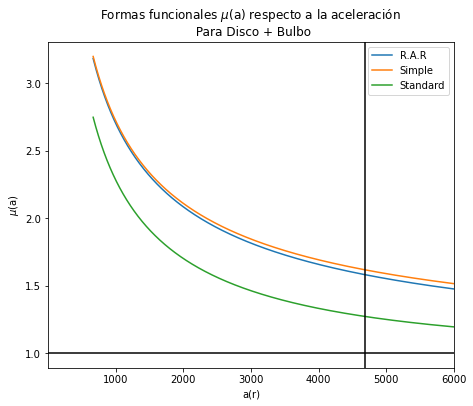

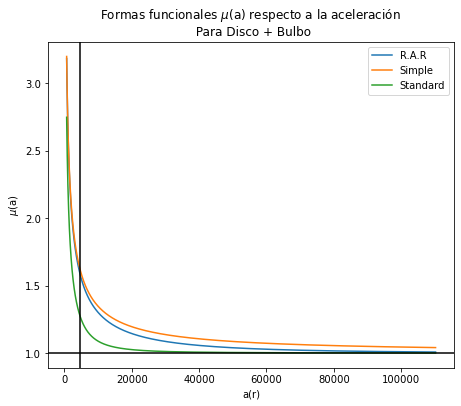

In [9]:
## Graficamos las formas funcionales de mu respecto a la aceleración para el halo, el disco y el bulbo

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b_b, r)), 
         mu_R(r, a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b_b, r))), 
         label='R.A.R')
plt.plot(a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b_b, r)), 
         mu_S(r, a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b_b, r))),
         label='Simple')
plt.plot(a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b_b, r)), 
         mu_Sd(r, a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b_b, r))),
         label='Standard')
plt.legend()
plt.axvline(4679.4, color='black')
plt.axhline(1.0, color='black')
plt.xlim(0.1,6000)
#plt.ylim(1, 2.5)
plt.xlabel('a(r)')
plt.ylabel('$\mu$(a)')
plt.title('Formas funcionales $\mu$(a) respecto a la aceleración \n Para Disco + Bulbo')

plt.figure(figsize=(16,6))
plt.subplot(122)
plt.plot(a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b_b, r)), 
         mu_R(r, a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b_b, r))), 
         label='R.A.R')
plt.plot(a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b_b, r)), 
         mu_S(r, a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b_b, r))),
         label='Simple')
plt.plot(a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b_b, r)), 
         mu_Sd(r, a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), a_bulbo(M_b, b_b, r))),
         label='Standard')
plt.legend()
plt.axvline(4679.4, color='black')
plt.axhline(1.0, color='black')
plt.xlabel('a(r)')
plt.ylabel('$\mu$(a)')
plt.title('Formas funcionales $\mu$(a) respecto a la aceleración \n Para Disco + Bulbo')


Text(0.5, 1.0, 'Velocidad Circular \n Disco + Bulbo')

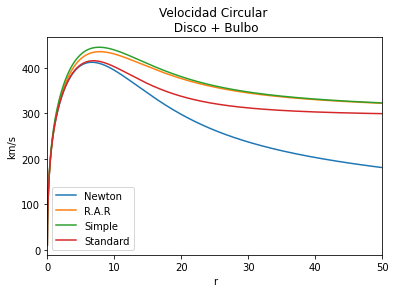

In [10]:
## Graficamos las velocidades circulares de Newton y mondianas, para ello usaremos

## v_N^2 = v_h^2 + v_d^2 + v_b^2                Velocidad circular en el esquema de Newton
## v_M^2 = mu (v_h^2 + v_d^2 + v_b^2)           Velocidad circular en el esquema de Mond

vel_cir_N = np.sqrt(vel_cir_halo(vel_cir_halo_cuadrado(M_h, b_h, r)) + vel_cir_disco_cuadrado(M_d, R_d, r) + 
                    vel_cir_bulbo_cuadrado(M_b, b_b, r))  ## VC Newton

vel_cir_R = np.sqrt(mu_R(r, a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), 
                                    a_bulbo(M_b, b_b, r))))* vel_cir_N

vel_cir_S = np.sqrt(mu_S(r, a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), 
                                    a_bulbo(M_b, b_b, r))))* vel_cir_N

vel_cir_Sd= np.sqrt(mu_Sd(r, a_total(a_halo(M_h, b_h, r), a_disco(vel_cir_disco_cuadrado(M_d, R_d, r), r), 
                                    a_bulbo(M_b, b_b, r))))*vel_cir_N

plt.plot(r, vel_cir_N, label='Newton')
plt.plot(r, vel_cir_R, label='R.A.R')
plt.plot(r, vel_cir_S, label='Simple')
plt.plot(r, vel_cir_Sd, label='Standard')
plt.legend()
plt.xlim(0, 50)
#plt.ylim(100, 320)
plt.xlabel('r')
plt.ylabel('km/s')
plt.title('Velocidad Circular \n Disco + Bulbo')

In [11]:
## Ajustemos a una galaxia real, NGC 2403, fijando los parámetros de la escala radial característica del bulbo (1.6)
## y del disco (2.1)

## Importamos las librerías necesarias

import pandas as pd

from scipy.optimize import curve_fit

## Leemos los datos

datos = pd.read_csv('Datos_NGC2403_CurvaRotacion', sep='   ')

/tmp/ipykernel_41352/727823772.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/tmp/ipykernel_41352/727823772.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos = pd.read_csv('Datos_NGC2403_CurvaRotacion', sep='   ')


In [12]:
datos.head()

,R(kpc),V(km/s)
0,0.05,53.95123
1,0.10,60.44677
2,0.15,66.02752
3,0.20,69.54928
4,0.25,71.69053


In [13]:
x = np.array(datos['R(kpc)'])
y = np.array(datos['V(km/s)'])

Error M_h: 0.03889346163052674 
Error R_h: 3.4079085147769215 
Error M_b: 0.07793765058046304 
Error M_d: 0.1538210393112826
M_h= 0.9999999999672408 
R_h= 6.441781055264765 
M_b= 0.003912712678889997 
M_d= 0.018586026571877298


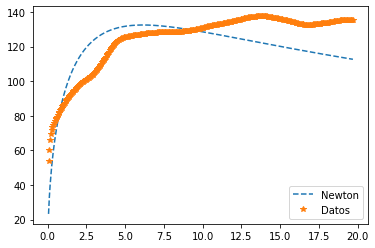

In [27]:
## Definimos la función de la velocidad circular para Newton

def vel_cir_HaloDiscoBulbo(r, M_h, R_h, M_b, M_d):
    
    vel_cir_halo_cuadrado = (r*G*M_h)/((r+R_h)*(r+R_h))
    
    R_d = 2.1
    Sigma_0 = M_d/(2*np.pi*R_d*R_d)
    y = r/(2.0*R_d)
    vel_cir_disco_cuadrado = ((0.5*np.pi*G*Sigma_0*r*r)/R_d)*(i0(y)*k0(y) - i1(y)*k1(y))
    
    R_b = 1.6
    vel_cir_bulbo_cuadrado = (r*G*M_b)/((r+R_b)*(r+R_b))
    
    vel_cir_HaloDiscoBulbo = np.sqrt(vel_cir_halo_cuadrado + vel_cir_disco_cuadrado + vel_cir_bulbo_cuadrado)
    
    return vel_cir_HaloDiscoBulbo

params_Newton, cov_Newton = curve_fit(vel_cir_HaloDiscoBulbo, x, y, method='trf', 
                                      bounds=(0, [1, 100, M_b > M_h, M_d > M_b]))

error_Newton = np.sqrt(np.diag(cov_Newton))

print('Error M_h:', error_Newton[0], '\nError R_h:', error_Newton[1], '\nError M_b:', error_Newton[2], 
      '\nError M_d:', error_Newton[3])


print('M_h=', params_Newton[0], '\nR_h=', params_Newton[1], '\nM_b=', params_Newton[2], '\nM_d=', 
      params_Newton[3])

y_pred_Newton = vel_cir_HaloDiscoBulbo(x, params_Newton[0], params_Newton[1], params_Newton[2], 
                                          params_Newton[3])


plt.plot(x, y_pred_Newton, '--', label='Newton')
plt.plot(x, y, '*', label='Datos')
plt.legend()

Error M_h: 0.029378918378480726 
Error R_h: 5.91038373461461 
Error M_b: 0.010453832437296723 
Error M_d: 0.03015424214957608
M_h= 0.17180366744099976 
R_h= 7.957203670304351 
M_b= 0.05841057002890326 
M_d= 0.01787017703347662


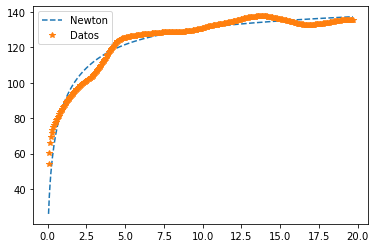

In [32]:
## Definimos la función de la velocidad circular para RAR

def vel_cir_HaloDiscoBulbo_RAR(r, M_h, R_h, M_b, M_d):
    
    vel_cir_halo_cuadrado = (r*G*M_h)/((r+R_h)*(r+R_h))
    
    R_d = 2.1
    Sigma_0 = M_d/(2*np.pi*R_d*R_d)
    y = r/(2.0*R_d)
    vel_cir_disco_cuadrado = ((0.5*np.pi*G*Sigma_0*r*r)/R_d)*(i0(y)*k0(y) - i1(y)*k1(y))
    
    R_b = 1.6
    vel_cir_bulbo_cuadrado = (r*G*M_b)/((r+R_b)*(r+R_b))
    
    a_total = vel_cir_bulbo_cuadrado/r + vel_cir_disco_cuadrado/r + vel_cir_halo_cuadrado/r
    
    mu_R = 1/(1 - np.exp(-np.sqrt(a_total/a_0)))
    
    vel_cir_HaloDiscoBulbo_RAR = np.sqrt(mu_R) * np.sqrt(vel_cir_halo_cuadrado + vel_cir_disco_cuadrado + 
                                                     vel_cir_bulbo_cuadrado)
    
    return vel_cir_HaloDiscoBulbo_RAR

limite_inferior = [0.0, 0.0, 0.0, 0.0]
limite_superior = [1.0, 100, M_b > M_h, M_d > M_b]

params_RAR, cov_RAR = curve_fit(vel_cir_HaloDiscoBulbo_RAR, x, y, method='trf', 
                                      bounds=(limite_inferior, limite_superior))

error_RAR = np.sqrt(np.diag(cov_RAR))

print('Error M_h:', error_RAR[0], '\nError R_h:', error_RAR[1], '\nError M_b:', error_RAR[2], 
      '\nError M_d:', error_RAR[3])

print('M_h=', params_RAR[0], '\nR_h=', params_RAR[1], '\nM_b=', params_RAR[2], '\nM_d=', params_RAR[3])

y_pred_RAR = vel_cir_HaloDiscoBulbo_RAR(x, params_RAR[0], params_RAR[1], params_RAR[2], params_RAR[3])


plt.plot(x, y_pred_RAR, '--', label='Newton')
plt.plot(x, y, '*', label='Datos')
plt.legend()

Error M_h: 0.029293625438887343 
Error R_h: 5.6963694346966145 
Error M_b: 0.010180154137312976 
Error M_d: 0.029532977294208083
M_h= 0.17591103335277014 
R_h= 7.98272902512566 
M_b= 0.05591529334916465 
M_d= 0.017919765559814747


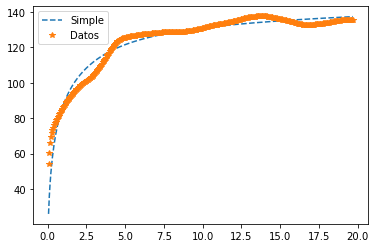

In [33]:
## Definimos la función de la velocidad circular para Simple

def vel_cir_HaloDiscoBulbo_Simple(r, M_h, R_h, M_b, M_d):
    
    vel_cir_halo_cuadrado = (r*G*M_h)/((r+R_h)*(r+R_h))
    
    R_d = 2.1
    Sigma_0 = M_d/(2*np.pi*R_d*R_d)
    y = r/(2.0*R_d)
    vel_cir_disco_cuadrado = ((0.5*np.pi*G*Sigma_0*r*r)/R_d)*(i0(y)*k0(y) - i1(y)*k1(y))
    
    R_b = 1.6
    vel_cir_bulbo_cuadrado = (r*G*M_b)/((r+R_b)*(r+R_b))
    
    a_total = vel_cir_bulbo_cuadrado/r + vel_cir_disco_cuadrado/r + vel_cir_halo_cuadrado/r
    
    mu_S = 0.5*(1 + np.sqrt(1 + 4*a_0/a_total))
    
    vel_cir_HaloDiscoBulbo_Simple = np.sqrt(mu_S) * np.sqrt(vel_cir_halo_cuadrado + vel_cir_disco_cuadrado + 
                                                     vel_cir_bulbo_cuadrado)
    
    return vel_cir_HaloDiscoBulbo_Simple

params_Simple, cov_Simple = curve_fit(vel_cir_HaloDiscoBulbo_Simple, x, y, method='trf', 
                                  bounds=(0, [1.0, 100, 1, 1]))

error_Simple = np.sqrt(np.diag(cov_Simple))

print('Error M_h:', error_Simple[0], '\nError R_h:', error_Simple[1], '\nError M_b:', error_Simple[2], 
      '\nError M_d:', error_Simple[3])

print('M_h=', params_Simple[0], '\nR_h=', params_Simple[1], '\nM_b=', params_Simple[2], '\nM_d=', params_Simple[3])

y_pred_Simple = vel_cir_HaloDiscoBulbo_Simple(x, params_Simple[0], params_Simple[1], params_Simple[2], 
                                              params_Simple[3])


plt.plot(x, y_pred_Simple, '--', label='Simple')
plt.plot(x, y, '*', label='Datos')
plt.legend()

Error M_h: 0.029293625438887343 
Error R_h: 5.6963694346966145 
Error M_b: 0.010180154137312976 
Error M_d: 0.029532977294208083
M_h= 0.17591103335277014 
R_h= 7.98272902512566 
M_b= 0.05591529334916465 
M_d= 0.017919765559814747


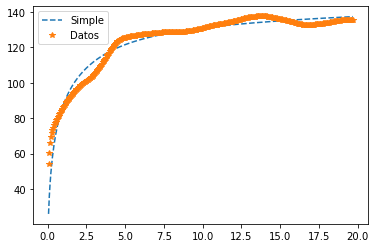

In [34]:
## Definimos la función de la velocidad circular para Standard

def vel_cir_HaloDiscoBulbo_Standard(r, M_h, R_h, M_b, M_d):
    
    vel_cir_halo_cuadrado = (r*G*M_h)/((r+R_h)*(r+R_h))
    
    R_d = 2.1
    Sigma_0 = M_d/(2*np.pi*R_d*R_d)
    y = r/(2.0*R_d)
    vel_cir_disco_cuadrado = ((0.5*np.pi*G*Sigma_0*r*r)/R_d)*(i0(y)*k0(y) - i1(y)*k1(y))
    
    R_b = 1.6
    vel_cir_bulbo_cuadrado = (r*G*M_b)/((r+R_b)*(r+R_b))
    
    a_total = vel_cir_bulbo_cuadrado/r + vel_cir_disco_cuadrado/r + vel_cir_halo_cuadrado/r
    
    mu_Sd = 0.5*(1 + np.sqrt(1 + 4*a_0/a_total))
    
    vel_cir_HaloDiscoBulbo_Standard = np.sqrt(mu_Sd) * np.sqrt(vel_cir_halo_cuadrado + vel_cir_disco_cuadrado + 
                                                     vel_cir_bulbo_cuadrado)
    
    return vel_cir_HaloDiscoBulbo_Standard

params_Standard, cov_Standard = curve_fit(vel_cir_HaloDiscoBulbo_Standard, x, y, method='trf', 
                                   bounds=(0, [1.0, 100, 1, 1]))

error_Standard = np.sqrt(np.diag(cov_Standard))

print('Error M_h:', error_Standard[0], '\nError R_h:', error_Standard[1], '\nError M_b:', error_Standard[2], 
      '\nError M_d:', error_Standard[3])

print('M_h=', params_Standard[0], '\nR_h=', params_Standard[1], '\nM_b=', params_Standard[2], '\nM_d=', 
      params_Standard[3])

y_pred_Standard = vel_cir_HaloDiscoBulbo_Standard(x, params_Standard[0], params_Standard[1], params_Standard[2], 
                                              params_Standard[3])


plt.plot(x, y_pred_Simple, '--', label='Simple')
plt.plot(x, y, '*', label='Datos')
plt.legend()

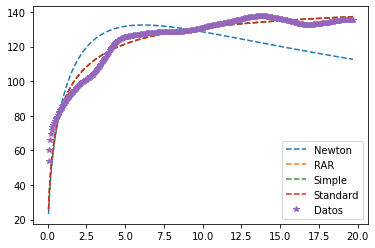

In [18]:
plt.plot(x, y_pred_Newton, '--', label='Newton')
plt.plot(x, y_pred_RAR, '--', label='RAR')
plt.plot(x, y_pred_Simple, '--', label='Simple')
plt.plot(x, y_pred_Standard, '--', label='Standard')
plt.plot(x, y, '*', label='Datos')
plt.legend()

In [19]:
print('Error \t M_h \t \t \t R_h \t \t \t M_b \t \t \t M_d')
print('Newton \t', error_Newton[0], '\t', error_Newton[1], '\t', error_Newton[2], '\t', error_Newton[3])
print('RAR \t', error_RAR[0], '\t', error_RAR[1], '\t', error_RAR[2], '\t', error_RAR[3])
print('Simple \t', error_Simple[0], '\t', error_Simple[1], '\t', error_Simple[2], '\t', error_Simple[3])
print('Standard', error_Standard[0], '\t', error_Standard[1], '\t', error_Standard[2], '\t', error_Standard[3])

Error 	 M_h 	 	 	 R_h 	 	 	 M_b 	 	 	 M_d
Newton 	 0.03889346163052674 	 3.4079085147769215 	 0.07793765058046304 	 0.1538210393112826
RAR 	 0.029378918378480726 	 5.91038373461461 	 0.010453832437296723 	 0.03015424214957608
Simple 	 0.029293625438887343 	 5.6963694346966145 	 0.010180154137312976 	 0.029532977294208083
Standard 0.029293625438887343 	 5.6963694346966145 	 0.010180154137312976 	 0.029532977294208083


In [37]:
print('Parametros \t M_h \t \t \t R_h \t \t \t M_b \t \t \t M_d')
print('Newton \t', params_Newton[0], '\t', params_Newton[1], '\t', params_Newton[2], '\t', params_Newton[3])
print('RAR \t', params_RAR[0], '\t', params_RAR[1], '\t', params_RAR[2], '\t', params_RAR[3])
print('Simple \t', params_Simple[0], '\t', params_Simple[1], '\t', params_Simple[2], '\t', params_Simple[3])
print('Standard', params_Standard[0], '\t', params_Standard[1], '\t', params_Standard[2], '\t', params_Standard[3])

Parametros 	 M_h 	 	 	 R_h 	 	 	 M_b 	 	 	 M_d
Newton 	 0.9999999999672408 	 6.441781055264765 	 0.003912712678889997 	 0.018586026571877298
RAR 	 0.17180366744099976 	 7.957203670304351 	 0.05841057002890326 	 0.01787017703347662
Simple 	 0.17591103335277014 	 7.98272902512566 	 0.05591529334916465 	 0.017919765559814747
Standard 0.17591103335277014 	 7.98272902512566 	 0.05591529334916465 	 0.017919765559814747
